# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("cardekho_data.csv")
df.head(5)

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


# Data Cleaning and preprocessing


In [3]:
df.isnull().sum()

full_name                0
selling_price            0
new_price            10410
year                     0
seller_type              0
km_driven                0
owner_type               0
fuel_type                0
transmission_type        0
mileage                160
engine                 110
max_power              337
seats                   87
dtype: int64

Here we can see that some of the features have some missing values in rows so we can delete them , it won't effect much on the dataset
and new_price feature has a big number of missing values so we should not delete it , we can fill these missing values later

In [4]:
df.shape

(19974, 13)

In [5]:
# dropping the rows with missing values
df.dropna(subset=['full_name', 'selling_price', 'year', 'seller_type','km_driven','owner_type', 'fuel_type',
                  'transmission_type', 'mileage', 'engine','max_power', 'seats'],how='any',axis=0, inplace=True)

df.dropna() function deletes the missing value rows when axis=0,
pay attention that we have not delete missing rows from  (new_price ) feature

In [6]:
df.shape

(19542, 13)

here we can see 432 rows have been deleted from the dataset

In [7]:
df.isnull().sum()

full_name                0
selling_price            0
new_price            10101
year                     0
seller_type              0
km_driven                0
owner_type               0
fuel_type                0
transmission_type        0
mileage                  0
engine                   0
max_power                0
seats                    0
dtype: int64

In [8]:
# Age of Vehicle
current_year = 2023
df["Age_of_vehicle"] = current_year - df["year"]
df.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Age_of_vehicle
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,11
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,7
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,13
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,11
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,8


In [9]:
# creating brand Column

df["full_name"] = df["full_name"].str.replace(" New ", " ")
df['brand']=df.full_name.str.split(' ').str.get(0)
df.loc[(df.brand == 'Land'),'brand']='Land Rover'  # row_lbl_index --Land , column_lbl_index--brand (set value here)

#creating model Column 
df['model']=df['full_name'].apply(lambda x: ' '.join(x.split(' ')[1:3]) if 'Dzire' in x else ''.join(x.split(' ')[1]))

In [10]:
df.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Age_of_vehicle,brand,model
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,11,Maruti,Alto
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,7,Hyundai,Grand
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,13,Hyundai,i20
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,11,Maruti,Alto
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,8,Ford,Ecosport


In [11]:
# Renaming car models

df.loc[(df.model == 'Wagon'),'model'] = 'Wagon R'
df.loc[(df.model == 'E'),'model'] = 'E Verito'
df.loc[(df.model == 'Land'),'model'] = 'Land Cruiser'

df.drop('full_name',axis = 1, inplace=True)

In [12]:
# Creating column "car_name"

df['car_name'] = df["brand"] +" "+ df["model"]
df_unique= pd.DataFrame(df['car_name'].value_counts())
df.head(5)

,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Age_of_vehicle,brand,model,car_name
0,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,11,Maruti,Alto,Maruti Alto
1,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,7,Hyundai,Grand,Hyundai Grand
2,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,13,Hyundai,i20,Hyundai i20
3,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,11,Maruti,Alto,Maruti Alto
4,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,8,Ford,Ecosport,Ford Ecosport


In [13]:
# Converting "new_price" into "min_price" & "max_price"

df['new_price1']=df['new_price'].str.lstrip('New Car (On-Road Price) : Rs.')
df.new_price1 = df.new_price1.str.replace('[*,,]', '',regex=True)
df[['new_price1','unit']] = df.new_price1.str.split(" ",expand=True)
df[['min_cost_price','max_cost_price']] = df.new_price1.str.split("-",expand=True)
df.min_cost_price = df.min_cost_price.str.replace('[A-Za-z]', '',regex=True)
df.max_cost_price = df.max_cost_price.str.replace('[A-Za-z]', '',regex=True)

In [14]:
# Changing datatype of min and max cost price into float

df['max_cost_price'] = df['max_cost_price'].astype('float64', errors = 'raise')
df['min_cost_price'] = df['min_cost_price'].astype('float64', errors = 'raise')
df.head()

,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Age_of_vehicle,brand,model,car_name,new_price1,unit,min_cost_price,max_cost_price
0,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,11,Maruti,Alto,Maruti Alto,NaN,NaN,NaN,NaN
1,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,7,Hyundai,Grand,Hyundai Grand,7.11-7.48,Lakh,7.11,7.48
2,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,13,Hyundai,i20,Hyundai i20,NaN,NaN,NaN,NaN
3,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,11,Maruti,Alto,Maruti Alto,NaN,NaN,NaN,NaN
4,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,8,Ford,Ecosport,Ford Ecosport,10.14-13.79,Lakh,10.14,13.79


In [15]:
# Converting cost price to appropriate units
df.loc[df.unit == "Lakh", 'min_cost_price'] = df['min_cost_price']*100000.0
df.loc[df.unit == "Lakh", 'max_cost_price'] = df['max_cost_price']*100000.0

df.loc[df.unit == "Cr", 'min_cost_price'] = df['min_cost_price']*10000000.0
df.loc[df.unit == "Cr", 'max_cost_price'] = df['max_cost_price']*10000000.0
df

df.drop(['unit','new_price1'],axis=1, inplace=True)
df.head()

,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Age_of_vehicle,brand,model,car_name,min_cost_price,max_cost_price
0,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,11,Maruti,Alto,Maruti Alto,NaN,NaN
1,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,7,Hyundai,Grand,Hyundai Grand,711000.0,748000.0
2,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,13,Hyundai,i20,Hyundai i20,NaN,NaN
3,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,11,Maruti,Alto,Maruti Alto,NaN,NaN
4,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,8,Ford,Ecosport,Ford Ecosport,1014000.0,1379000.0


In [16]:
# Filling cars whose "max_cost_price" is missing with "min_cost_price"

df['max_cost_price'] = df['max_cost_price'].fillna(df['min_cost_price'])
df.drop(df[(df['max_cost_price'])==(df['min_cost_price'])].index, inplace=True)
df.head()

,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Age_of_vehicle,brand,model,car_name,min_cost_price,max_cost_price
0,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,11,Maruti,Alto,Maruti Alto,NaN,NaN
1,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,7,Hyundai,Grand,Hyundai Grand,711000.0,748000.0
2,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,13,Hyundai,i20,Hyundai i20,NaN,NaN
3,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,11,Maruti,Alto,Maruti Alto,NaN,NaN
4,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,8,Ford,Ecosport,Ford Ecosport,1014000.0,1379000.0


In [17]:
#Filling missing cost price of cars with the mean of their respective car models

df['min_cost_price'] = df['min_cost_price'].fillna(df.groupby(['car_name'])['min_cost_price'].transform('mean'))
df['max_cost_price'] = df['max_cost_price'].fillna(df.groupby(['car_name'])['max_cost_price'].transform('mean'))

In [18]:
# Converting "selling_price" to appropriate units
df.selling_price = df.selling_price.str.replace('[*,,]', '',regex=True)
df[['selling_price','unit']] = df.selling_price.str.split(expand=True)
df['selling_price'] = df['selling_price'].astype('float64', errors = 'raise')


df.loc[df.unit == "Lakh", 'selling_price'] = df['selling_price']*100000.0
df.loc[df.unit == "Cr", 'selling_price'] = df['selling_price']*10000000.0
df=df.drop(['unit','new_price'],axis=1)
df.head()

,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Age_of_vehicle,brand,model,car_name,min_cost_price,max_cost_price
0,120000.0,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,11,Maruti,Alto,Maruti Alto,3.570039e+05,4.654015e+05
1,550000.0,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,7,Hyundai,Grand,Hyundai Grand,7.110000e+05,7.480000e+05
2,215000.0,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,13,Hyundai,i20,Hyundai i20,8.540829e+05,1.307926e+06
3,226000.0,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,11,Maruti,Alto,Maruti Alto,3.570039e+05,4.654015e+05
4,570000.0,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,8,Ford,Ecosport,Ford Ecosport,1.014000e+06,1.379000e+06


In [20]:
# Removing unwanted non-numeric data from columns
colmns = [ "mileage","km_driven","engine","max_power","seats"]
df[colmns] = df[colmns].replace(r'[^\d.]+', '', regex=True)
df[colmns]= df[colmns].replace('', '0', regex=True)

In [21]:
df.dropna(how='any',axis=0, inplace=True)
df.drop(["year"],axis=1,inplace=True)

# Changing datatype to float
df= df.astype({'km_driven': 'float64', 'mileage': 'float64', 'engine': 'float64', 'max_power': 'float64', 'seats': 'float64','min_cost_price': 'float64','max_cost_price': 'float64'})
print(df.dtypes)


selling_price        float64
seller_type           object
km_driven            float64
owner_type            object
fuel_type             object
transmission_type     object
mileage              float64
engine               float64
max_power            float64
seats                float64
Age_of_vehicle         int64
brand                 object
model                 object
car_name              object
min_cost_price       float64
max_cost_price       float64
dtype: object


In [22]:
# Reordering columns

col_order=['car_name','brand','model','min_cost_price','max_cost_price','Age_of_vehicle','km_driven','seller_type','fuel_type','transmission_type','mileage','engine','max_power','seats','selling_price']
df=df[col_order]
df.head(3)

,car_name,brand,model,min_cost_price,max_cost_price,Age_of_vehicle,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,357003.861004,4.654015e+05,11,120000.0,Individual,Petrol,Manual,19.7,796.0,46.3,5.0,120000.0
1,Hyundai Grand,Hyundai,Grand,711000.000000,7.480000e+05,7,20000.0,Individual,Petrol,Manual,18.9,1197.0,82.0,5.0,550000.0
2,Hyundai i20,Hyundai,i20,854082.865169,1.307926e+06,13,60000.0,Individual,Petrol,Manual,17.0,1197.0,80.0,5.0,215000.0


# Removing Outliers

In [23]:
# Dropping zero valued cells

df.drop(df[df['seats'] == 0].index, inplace = True)
df.drop(df[df['mileage'] == 0].index, inplace = True)
df.drop(df[df['km_driven'] == 0].index, inplace = True)
df.drop(df[df['Age_of_vehicle'] == 0].index, inplace = True)
df.drop(df[df['max_power'] == 0].index, inplace = True)

In [24]:
df.isnull().sum()

car_name             0
brand                0
model                0
min_cost_price       0
max_cost_price       0
Age_of_vehicle       0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [25]:
# Dropping out of boundary values

df.drop(df[(df['Age_of_vehicle'] > 20) ].index, inplace = True)
df.drop(df[df['km_driven'] >300000 ].index, inplace = True)
df.shape

(14936, 15)

In [26]:
# Removing the outliers using Interquartile Range for all columns

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
      
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
      
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if ((x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

out_columns = df[['km_driven','Age_of_vehicle','mileage','engine','max_power','seats','selling_price','min_cost_price','max_cost_price']]  
for i in out_columns:
    removeOutliers(df, i)
  
#Assigning filtered data back to our original variable

df = filtered_data
print("Shape of data after outlier removal is: ", df.shape)

IQR value for column km_driven is: 40000.0
IQR value for column Age_of_vehicle is: 4.0
IQR value for column mileage is: 5.699999999999999
IQR value for column engine is: 385.0
IQR value for column max_power is: 39.400000000000006
IQR value for column seats is: 0.0
IQR value for column selling_price is: 420000.0
IQR value for column min_cost_price is: 605000.0
IQR value for column max_cost_price is: 852500.4643962848
Shape of data after outlier removal is:  (13473, 15)


# Final Preprocessing

In [27]:
# Converting "min_cost_price" and "max_cost_price" to "avg_cost_price" using mean

df['avg_cost_price']=(df['min_cost_price']+df['max_cost_price'])/2

df=df.drop(['min_cost_price','max_cost_price'], axis=1)

df['avg_cost_price']=df['avg_cost_price']/100000
df['selling_price']=df['selling_price']/100000

In [28]:
df.head()

,car_name,brand,model,Age_of_vehicle,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,avg_cost_price
0,Maruti Alto,Maruti,Alto,11,120000.0,Individual,Petrol,Manual,19.70,796.0,46.30,5.0,1.20,4.112027
1,Hyundai Grand,Hyundai,Grand,7,20000.0,Individual,Petrol,Manual,18.90,1197.0,82.00,5.0,5.50,7.295000
2,Hyundai i20,Hyundai,i20,13,60000.0,Individual,Petrol,Manual,17.00,1197.0,80.00,5.0,2.15,10.810042
3,Maruti Alto,Maruti,Alto,11,37000.0,Individual,Petrol,Manual,20.92,998.0,67.10,5.0,2.26,4.112027
4,Ford Ecosport,Ford,Ecosport,8,30000.0,Dealer,Diesel,Manual,22.77,1498.0,98.59,5.0,5.70,11.965000


In [29]:
df.to_csv("cleaned_data_cardekho.csv")

# Exploratory Data Analysis

CarName vs CostPrice and SellingPrice

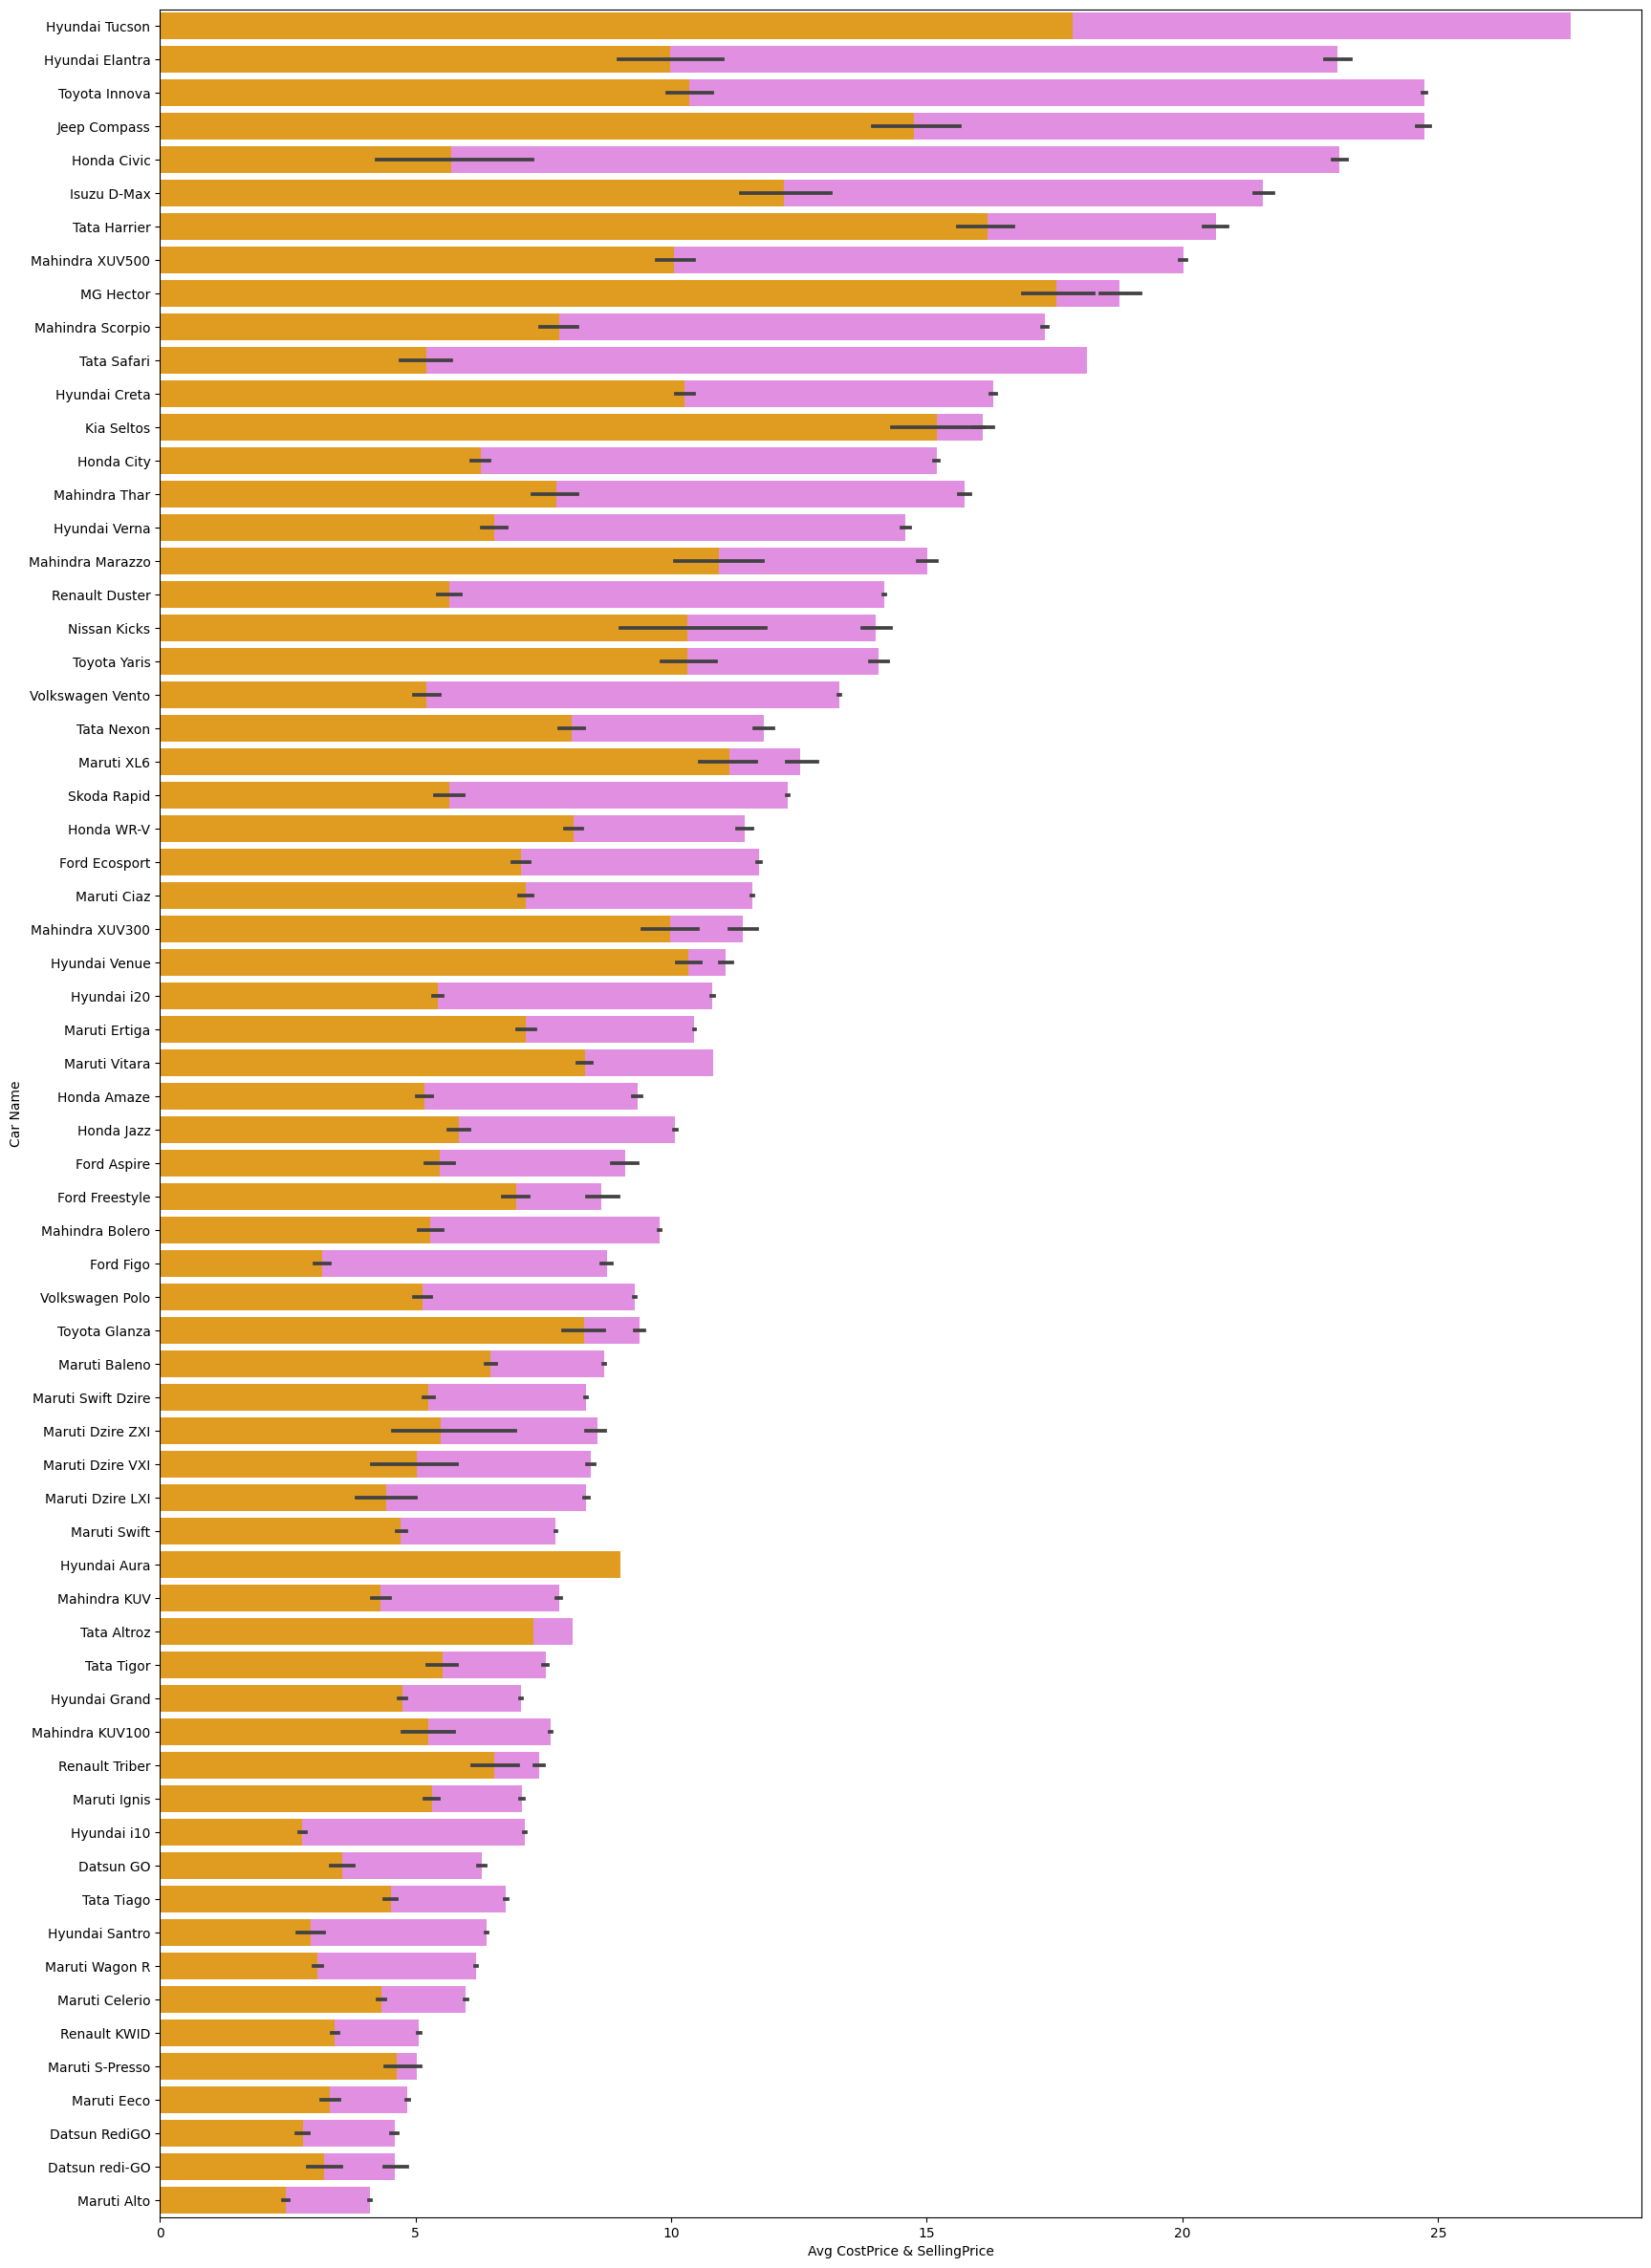

In [30]:
top_sell = df.sort_values(by='avg_cost_price', ascending=False)

ax = plt.subplots(figsize=(20,30))
  
# plotting columns
ax = sns.barplot(x=top_sell.avg_cost_price, y=top_sell.car_name, color='violet')
ax = sns.barplot(x=top_sell.selling_price, y=top_sell.car_name,color='orange')
  
# renaming the axes
ax.set(xlabel="Avg CostPrice & SellingPrice", ylabel="Car Name")
  
# visulaizing illustration
plt.show()

In [32]:
# Dropping Hyundai Aura Hyundai Aura
df.drop(df[df['car_name']=='Hyundai Aura'].index, axis=0,  inplace=True)

SellerType vs SellingPrice

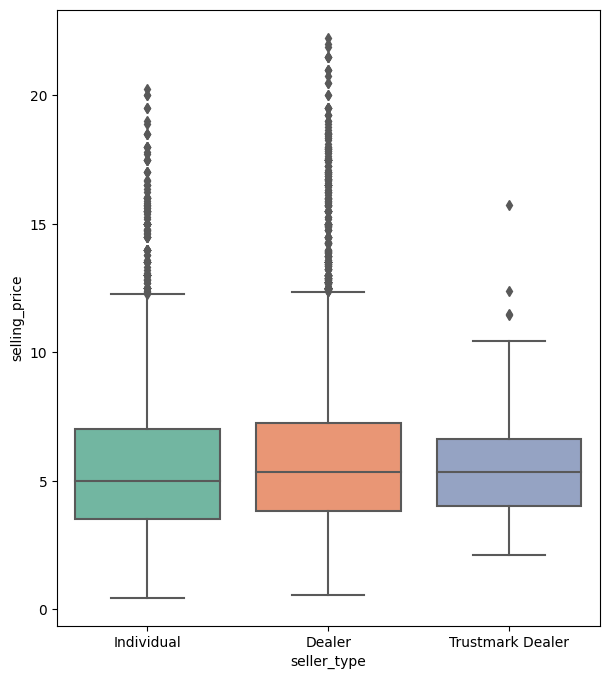

In [33]:
figure = plt.figure(figsize=(7,8))
sns.boxplot(x='seller_type',y='selling_price', data=df, palette="Set2")
plt.show()

Count of Seller Types

<AxesSubplot: xlabel='seller_type', ylabel='count'>

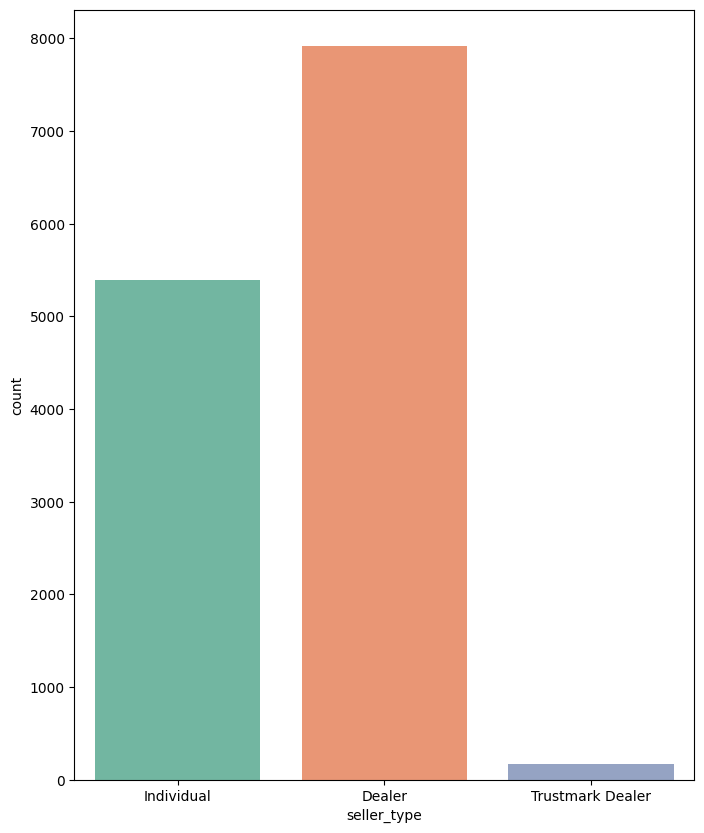

In [35]:
figure = plt.figure(figsize=(8,10))
sns.countplot(x='seller_type', data=df, palette="Set2")

<AxesSubplot: xlabel='fuel_type', ylabel='count'>

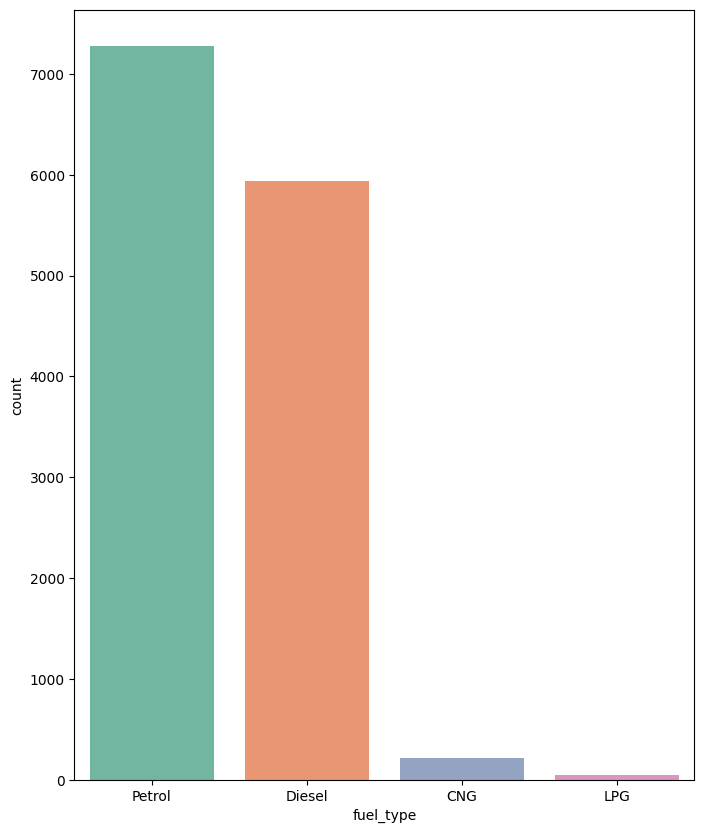

In [36]:
# Count of Fuel Types

figure = plt.figure(figsize=(8,10))
sns.countplot(x='fuel_type', data=df, palette="Set2")

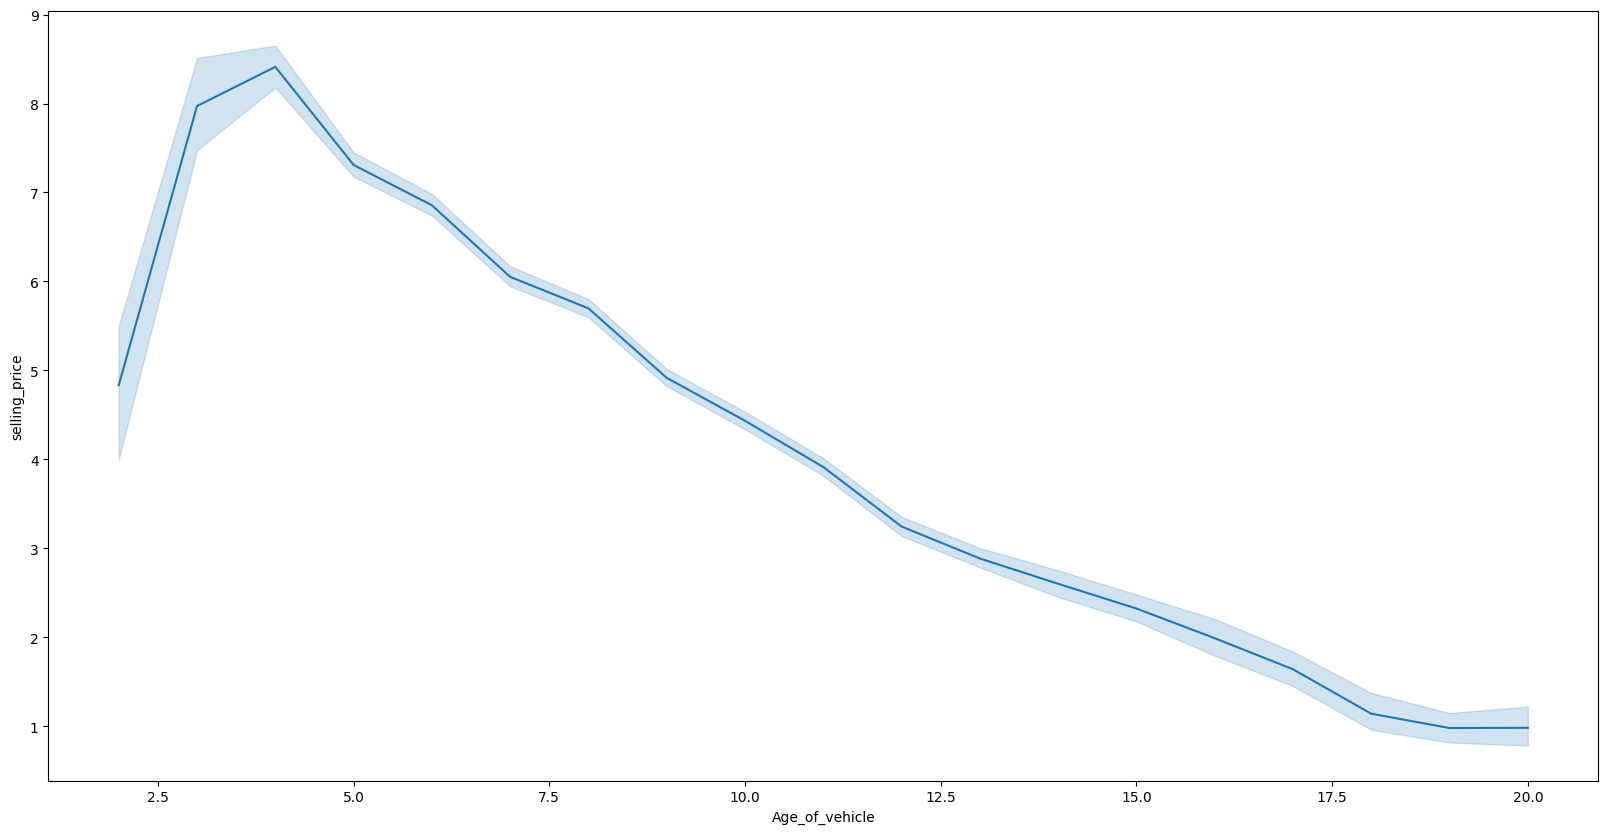

In [37]:
# vehicle_age  vs  selling_price

plt.figure(figsize=(20,10))
sns.lineplot(x='Age_of_vehicle',y='selling_price',data=df)
plt.ticklabel_format(style='plain')

# here price are increasing in the begining because data is till 2017 and we are calculating it in 2023